In [24]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import os

In [16]:
train_parasitized_dir = os.path.join('cell_images/Parasitized/')
train_uninfected_dir = os.path.join('cell_images/Uninfected/')

In [20]:
train_p_names = os.listdir(train_parasitized_dir)
print (train_p_names[:1])

train_u_names = os.listdir(train_uninfected_dir)

print (train_u_names[:1])

['C118P79ThinF_IMG_20151002_105018_cell_150.png']
['C13NThinF_IMG_20150614_131318_cell_179.png']


In [22]:
print ("The number of training examples in parasitized images is: ",len(train_p_names))
print ("The number of training examples in uninfected images is: ",len(train_u_names))

The number of training examples in parasitized images is:  13780
The number of training examples in uninfected images is:  13780


In [25]:
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

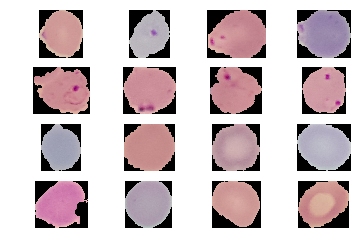

In [27]:
#fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_parasitized_pix = [os.path.join(train_parasitized_dir, fname) 
                for fname in train_p_names[pic_index-8:pic_index]]
next_uninfected_pix = [os.path.join(train_uninfected_dir, fname) 
                for fname in train_u_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_parasitized_pix+next_uninfected_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


# Building the model

In [33]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(2,activation='sigmoid')
    
])

In [34]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
__________

In [36]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=0.01),loss='binary_crossentropy',metrics=['acc'])

# Data Preprocessing

In [38]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_gen = ImageDataGenerator(rescale=1/255)

In [39]:
train_generator = train_gen.flow_from_directory('cell_images/',target_size=(32,32),batch_size=128,class_mode='binary')

Found 27558 images belonging to 2 classes.
